## Testing the train.py


In [1]:
!python train.py

2023-11-07 02:06:51.113104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-07 02:06:51.113174: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-07 02:06:52.434157: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-07 02:06:52.434402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-07 02:06:52.434442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

## Testing test.py

In [2]:
!python test.py

2023-11-07 02:07:45.028730: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-07 02:07:45.028769: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-07 02:07:47.133766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-07 02:07:47.134034: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-07 02:07:47.134078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

## Testing Code on handwritten digits


In [5]:
from PIL import Image
from keras.models import load_model
import numpy as np


input_size = 28 * 28  # 784

model = load_model('model_Omar_Rabbah.h5')


def load_images(file_name):
    img = Image.open(file_name).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img = np.array(img)  # Convert to NumPy array
    img = img.reshape(1, -1)  # Flatten to (1, 784) shape
    img = img/255
    return img

# List of image file names and their corresponding actual labels
image_data = [
    ('2_0.jpg', 2),
    ('2_1.jpg', 2),
    ('2_2.jpg', 2),
    ('2_3.jpg', 2),
    ('2_4.jpg', 2)
]



for file_name, actual_label in image_data:
    x_test = load_images(file_name)
    predictionn = model.predict(x_test) 
    print(predictionn)
    predics = np.argmax(model.predict(x_test), axis=1)
    print(f"Prediction for {file_name}: {predics[0]} (Actual: {actual_label})")
    


1/1 [==============================] - 0s 130ms/step
[[3.5786924e-23 0.0000000e+00 5.2233421e-22 1.0000000e+00 0.0000000e+00
  1.7402701e-20 2.5140413e-20 1.0815265e-29 5.8354276e-13 1.3549173e-32]]
1/1 [==============================] - 0s 41ms/step
Prediction for 2_0.jpg: 3 (Actual: 2)
1/1 [==============================] - 0s 42ms/step
[[2.7844664e-21 0.0000000e+00 5.4845112e-21 1.0000000e+00 0.0000000e+00
  1.6839951e-20 3.8179876e-19 4.2375713e-27 1.3706994e-11 2.0275885e-32]]
1/1 [==============================] - 0s 64ms/step
Prediction for 2_1.jpg: 3 (Actual: 2)
1/1 [==============================] - 0s 36ms/step
[[3.8061796e-19 0.0000000e+00 5.2727987e-19 1.0000000e+00 0.0000000e+00
  2.9896150e-18 4.3881010e-16 5.5261297e-23 2.2014979e-09 4.7415273e-28]]
1/1 [==============================] - 0s 58ms/step
Prediction for 2_2.jpg: 3 (Actual: 2)
1/1 [==============================] - 0s 46ms/step
[[2.4760008e-19 0.0000000e+00 1.6771820e-18 1.0000000e+00 0.0000000e+00
  2.0630321

## Finding 12 random unsuccessful predictions

313/313 [==============================] - 1s 3ms/step


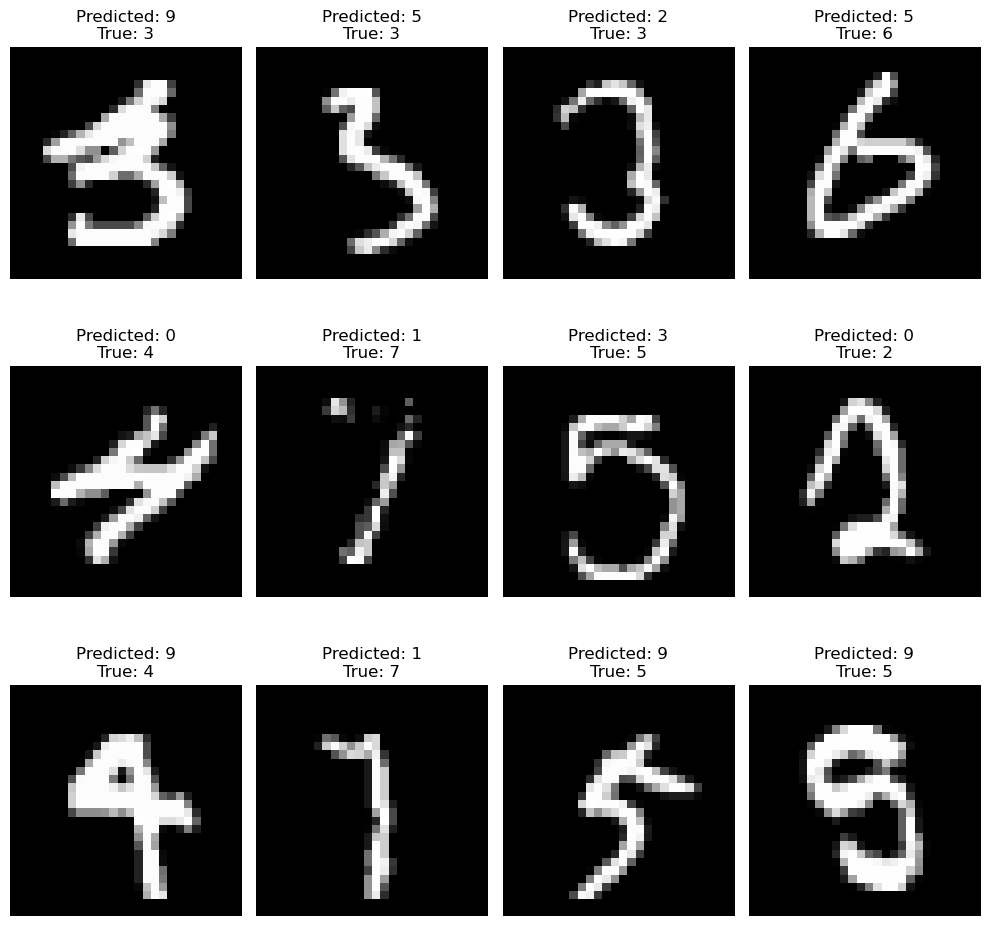

In [6]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import Mnist_keras

model = load_model('model_Omar_Rabbah.h5')


(train_images , train_labels) , (test_images, test_labels) = Mnist_keras.load_data()

x_test  = test_images
y_test = test_labels

x_test,y_test = shuffle(x_test,y_test)

# Make predictions on the test data
predictions = model.predict(x_test)

# Find the indices of unsuccessful predictions
unsuccessful_indices = np.where(np.argmax(predictions,axis = 1) != y_test)[0]

fig, axes = plt.subplots(3, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < len(unsuccessful_indices):
        index = unsuccessful_indices[i]
        image = x_test[index].reshape(28, 28)
        predicted_label = np.argmax(predictions[index])
        true_label = y_test[index]

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {predicted_label}\nTrue: {true_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 4ms/step


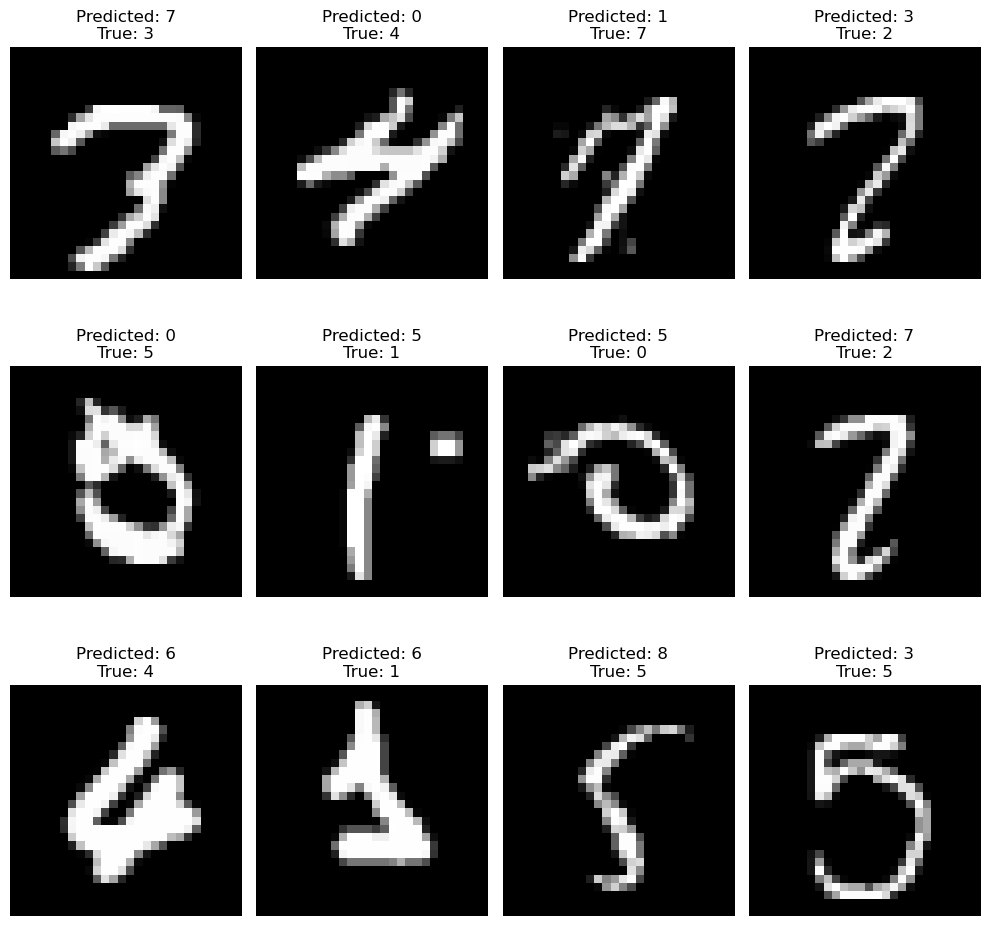

In [8]:
# Running the code again 
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import Mnist_keras

model = load_model('model_Omar_Rabbah.h5')


(train_images , train_labels) , (test_images, test_labels) = Mnist_keras.load_data()

x_test  = test_images
y_test = test_labels

x_test,y_test = shuffle(x_test,y_test)

# Make predictions on the test data
predictions = model.predict(x_test)

# Find the indices of unsuccessful predictions
unsuccessful_indices = np.where(np.argmax(predictions,axis = 1) != y_test)[0]

fig, axes = plt.subplots(3, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < len(unsuccessful_indices):
        index = unsuccessful_indices[i]
        image = x_test[index].reshape(28, 28)
        predicted_label = np.argmax(predictions[index])
        true_label = y_test[index]

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Predicted: {predicted_label}\nTrue: {true_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
len(unsuccessful_indices)

211